# Using ML models for fast inference for two populations

GADMA has trained machine learning models to speed up the demographic inference of two populations using automatic model construction. The latter means that models should be set using ``Initial structure`` and ``Final structure`` options.

Here we show the example of usual GADMA launch and launch using ML models.

## Dataset

The dataset we will use is simulated dataset for two populations named `2_BotDivMig_8_Sim` from [`deminf_data`](https://github.com/noscode/demographic_inference_data). The description of its eight parameters could be found in the repository of `deminf_data` package given above.

We note that the best known value of log-likelihood is equal to **-1035.905**. The data is available in  `fs_data.fs` file. The picture of the best model and simulated SFS data could be found below:

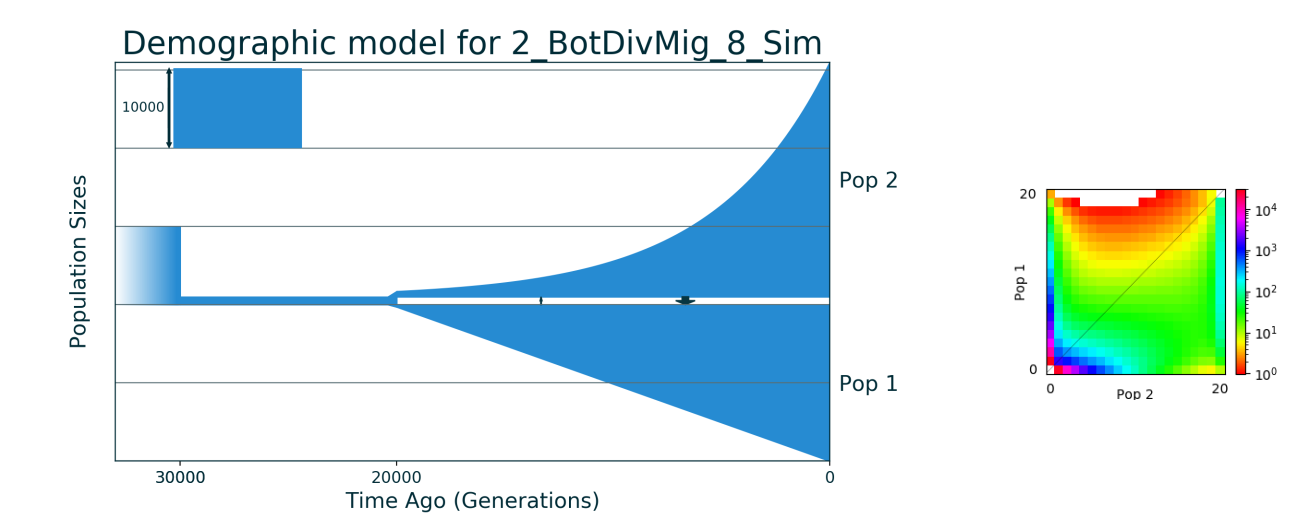

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

Image("2_BotDivMig_8_Sim_picture.png")

## Usual GADMA run with structure (2, 1)

First we run usual GADMA without any ML models to infer demographic model with (2,1) structure. Parameters of the run are following:

In [2]:
!cat params_gadma_usual

Input file: fs_data.fs
Output directory: usual_gadma_results
Initial structure: 2,1

# For example inference we restrict number of evaluations
global maxeval: 2000

Number of repeats: 32
Number of processes: 4


To run GADMA:

In [ ]:
!gadma -p params_gadma_usual

### Results

We have run usual GADMA and results are in `usual_gadma_results` directory. We will take a look at two best and three worst models

In [22]:
!tail -39 usual_gadma_results/GADMA.log | head -5

[025:33:11]
All best by log-likelihood models
Number	log-likelihood	Model
Run 15	-1035.95	[ [ 1.399(t1), [0.108(nu11)], [Sud(dyn11)] ],	[ 1 pop split   34.16% (s1) [0.037(s1*nu11), 0.071((1-s1)*nu11)] ],	[ 0.995(t2), [1.994(nu21), 2.992(nu22)], [[0, 1.001(m2_12)], [0.1(m2_21), 0]], [Lin(dyn21), Exp(dyn22)] ] ]	f	(theta =  20033.24)
Run 5	-1035.96	[ [ 3.925(t1), [0.133(nu11)], [Sud(dyn11)] ],	[ 1 pop split   34.57% (s1) [0.046(s1*nu11), 0.087((1-s1)*nu11)] ],	[ 1.212(t2), [2.434(nu21), 3.654(nu22)], [[0, 0.821(m2_12)], [0.081(m2_21), 0]], [Lin(dyn21), Exp(dyn22)] ] ]	f	(theta =  16420.77)


In [29]:
!tail -39 usual_gadma_results/GADMA.log | tail -7 | head -3

Run 12	-4403.04	[ [ 0.836(t1), [0.01(nu11)], [Sud(dyn11)] ],	[ 1 pop split   99.57% (s1) [0.01(s1*nu11), 4.28e-05((1-s1)*nu11)] ],	[ 2.507(t2), [1.023(nu21), 2.106(nu22)], [[0, 2.46(m2_12)], [7.09e-10(m2_21), 0]], [Exp(dyn21), Exp(dyn22)] ] ]	(theta =  28224.70)
Run 17	-4520.88	[ [ 0.185(t1), [0.012(nu11)], [Sud(dyn11)] ],	[ 1 pop split   99.76% (s1) [0.012(s1*nu11), 2.76e-05((1-s1)*nu11)] ],	[ 1.37(t2), [0.514(nu21), 0.998(nu22)], [[0, 4.528(m2_12)], [0.001(m2_21), 0]], [Exp(dyn21), Exp(dyn22)] ] ]	f	(theta =  53917.09)
Run 31	-5217.31	[ [ 0.006(t1), [0.822(nu11)], [Exp(dyn11)] ],	[ 1 pop split   99.90% (s1) [0.821(s1*nu11), 8.22e-04((1-s1)*nu11)] ],	[ 2.206(t2), [0.957(nu21), 2.245(nu22)], [[0, 2.229(m2_12)], [0.001(m2_21), 0]], [Exp(dyn21), Exp(dyn22)] ] ]	f	(theta =  24712.71)


## Usual GADMA with trained ML models for inference

Now we will run GADMA with available trained ML models. In order to use them one should set ``Used ML models`` in parameters file to the list of desired models. There are four of them:

- Random forest with independent estimators (`RandomForestIndependent`)
- Random forest with dependent estimators (`RandomForestDependent`)
- Random forest with multioutput estimators (`RandomForestMultiOutput`)
- Convolutional neural network (`CNN`)

For our example we will use all of them as they demonstrated best convergence:

In [6]:
!cat params_gadma_with_ml_models

Input file: fs_data.fs
Output directory: gadma_with_ml_models_results
Initial structure: 2,1

# We want to use all available ML models
Used ML models: [RandomForestIndependent, RandomForestDependent, RandomForestMultiOutput, CNN]

# For example inference we restrict number of evaluations
global maxeval: 2000
local optimizer: None

Number of repeats: 32
Number of processes: 4


To run GADMA:

In [ ]:
!gadma -p params_gadma_with_ml_models

### Results

We have run GADMA with Ml models and results are in `gadma_with_ml_models_results` directory. We will also take a look at two best and three worst models. We can see that the overall time of inference is much smaller (2 hours vs 25 hours for usual GADMA launch). The best model obtained using ML models is close to the optimum but worse than those obtained from usual GADMA run. But the worst models are better in case of ML models meaning that mean run is better.

In [30]:
!tail -50 gadma_with_ml_models_results/GADMA.log | head -5

[002:42:52]
All best by log-likelihood models
Number	log-likelihood	Model
Run 24	-1035.98	[ [ 0.434(t1), [0.055(nu11)], [Sud(dyn11)] ],	[ 1 pop split   35.10% (s1) [0.019(s1*nu11), 0.036((1-s1)*nu11)] ],	[ 0.505(t2), [1.013(nu21), 1.521(nu22)], [[0, 1.973(m2_12)], [0.198(m2_21), 0]], [Lin(dyn21), Exp(dyn22)] ] ]	f	(theta =  39475.58)
Run 25	-1036.02	[ [ 2.286(t1), [0.048(nu11)], [Sud(dyn11)] ],	[ 1 pop split   35.36% (s1) [0.017(s1*nu11), 0.031((1-s1)*nu11)] ],	[ 0.43(t2), [0.862(nu21), 1.293(nu22)], [[0, 2.311(m2_12)], [0.231(m2_21), 0]], [Lin(dyn21), Exp(dyn22)] ] ]	f	(theta =  46344.47)


In [28]:
!tail -50 gadma_with_ml_models_results/GADMA.log | tail -18 | head -3

Run 8	-2105.74	[ [ 3.99(t1), [0.141(nu11)], [Sud(dyn11)] ],	[ 1 pop split   21.47% (s1) [0.03(s1*nu11), 0.11((1-s1)*nu11)] ],	[ 0.522(t2), [1.006(nu21), 1.957(nu22)], [[0, 1.631(m2_12)], [0.001(m2_21), 0]], [Sud(dyn21), Exp(dyn22)] ] ]	f	(theta =  30999.42)
Run 20	-2110.46	[ [ 3.99(t1), [0.163(nu11)], [Sud(dyn11)] ],	[ 1 pop split   17.95% (s1) [0.029(s1*nu11), 0.134((1-s1)*nu11)] ],	[ 0.553(t2), [1.105(nu21), 2.059(nu22)], [[0, 1.489(m2_12)], [0.001(m2_21), 0]], [Sud(dyn21), Exp(dyn22)] ] ]	f	(theta =  28517.64)
Run 12	-2349.68	[ [ 3.99(t1), [0.244(nu11)], [Sud(dyn11)] ],	[ 1 pop split   82.56% (s1) [0.201(s1*nu11), 0.043((1-s1)*nu11)] ],	[ 0.706(t2), [1.522(nu21), 2.131(nu22)], [[0, 1.05(m2_12)], [0.001(m2_21), 0]], [Sud(dyn21), Lin(dyn22)] ] ]	f	(theta =  20772.42)


### Model

The picture of the best model obtained using GADMA with ML models:

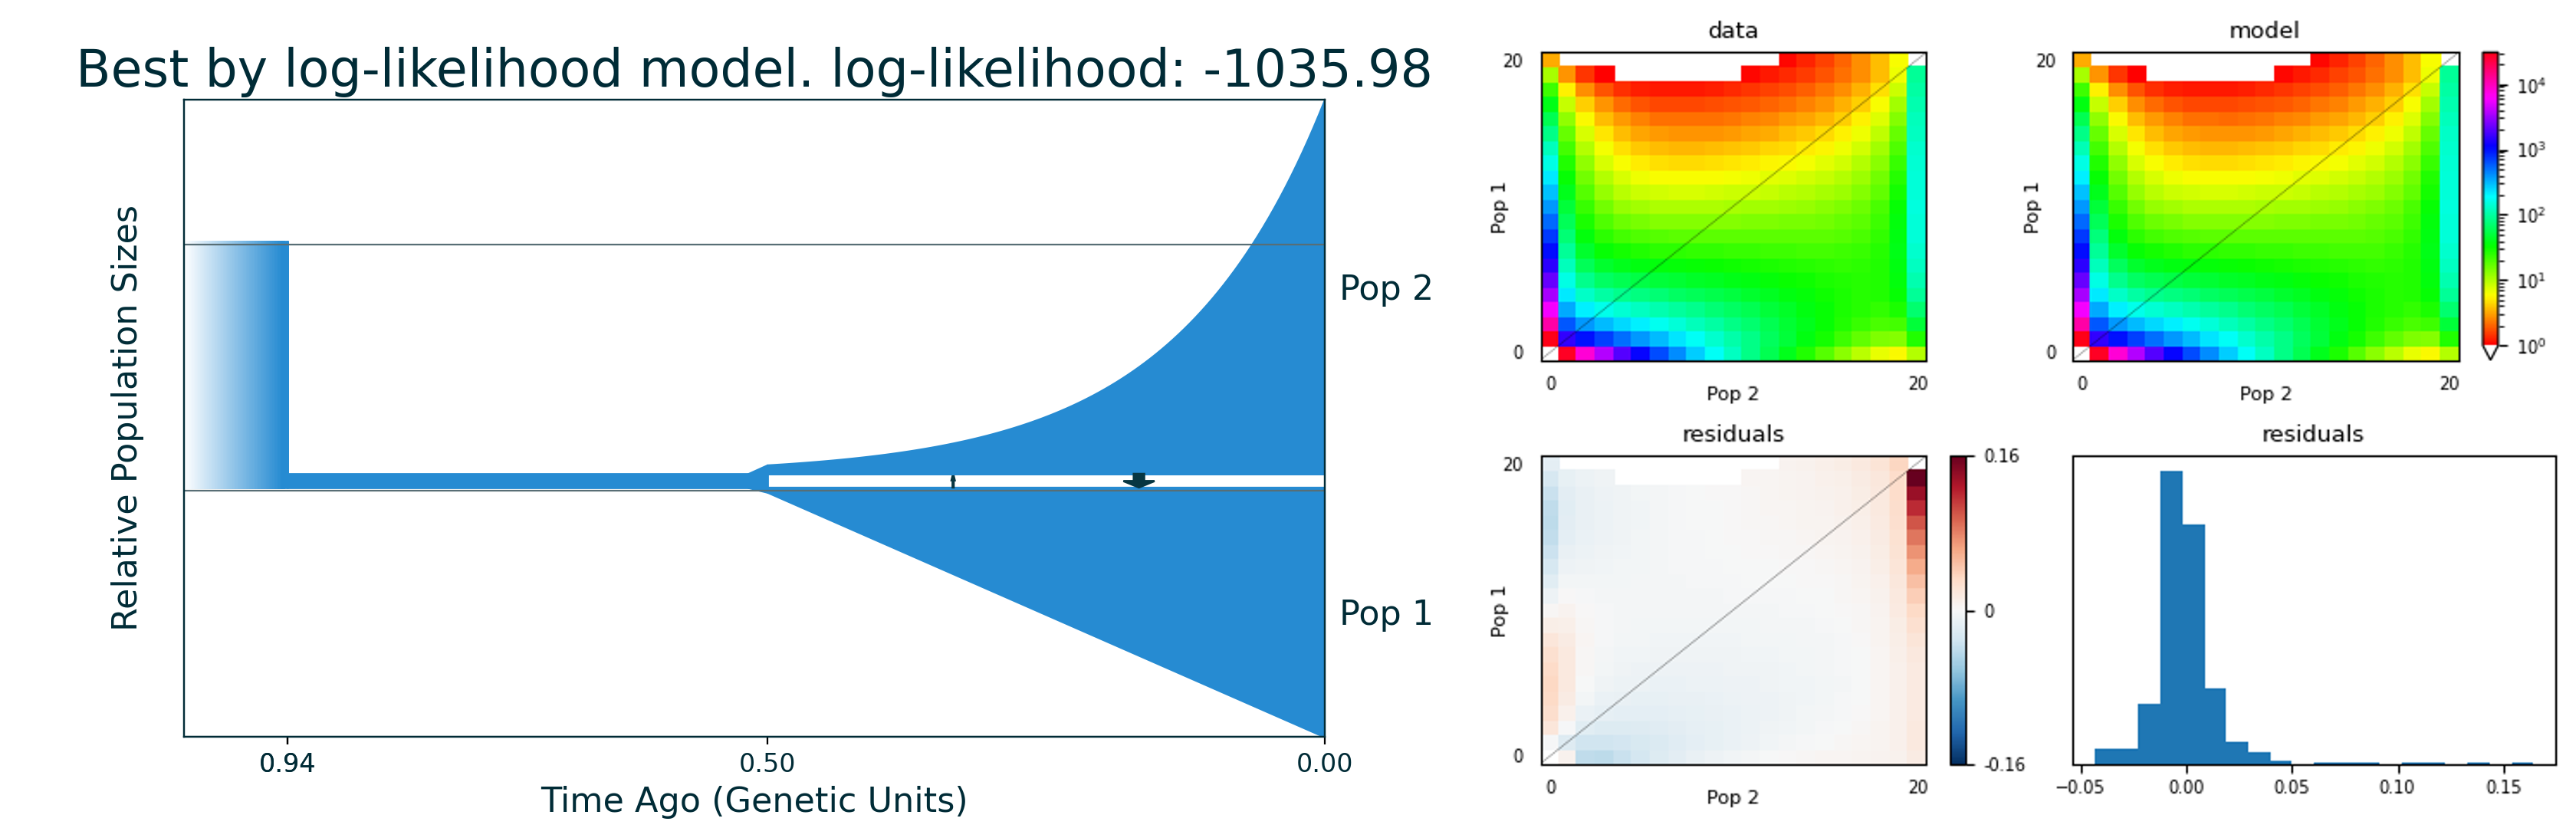

In [31]:
Image("gadma_with_ml_models_results/best_logLL_model.png")

## Conclusions

ML models provide faster and better on average demographic inference than usual GADMA run. It is better to use all models together as they are more effective that way. Unfortunately, ML models could be used only for demographic inference of two populations.